# Iris Flower Species Prediction using Decision Tree
_Builds a Decision Tree classifier to classify Iris flower species._

In [185]:
# Imports required modules and methods

import pandas as pd

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree

## Retrieving & Analyzing the Data

In [186]:
# Loads the iris dataset
iris = load_iris(return_X_y=False, as_frame=True)

# Checks the bunch objects available throgh keys
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [187]:
# Displays few instances from the dataset
display(iris.data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [188]:
# Checks wine class distribution
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [189]:
# Checks for the basic information about the dataset
iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


All 4 features were found to be numerical with no missing values in any of the features

In [190]:
# Checks for basic statistics of the dataset
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [191]:
iris.data.assign(target=iris.target).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


## Data Preparation

### Splitting Data
Splits the data into train and test set for performing model performance evaluation.

In [192]:
# Splits the data into train and test set with stratification on wine class
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (120, 4)
Test set shape: (30, 4)


## Modeling

In [193]:
# Initializes a classifier for a decision tree with a specific depth passed as parameter
dtree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fits the model on train set
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica')]

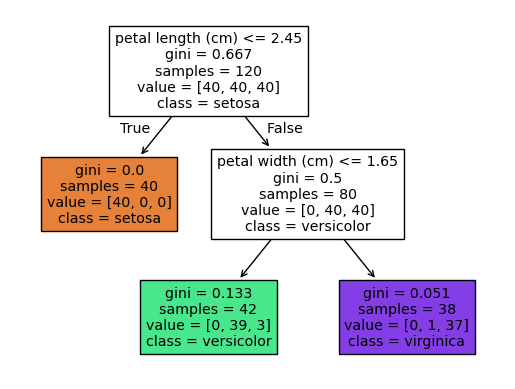

In [194]:
# Visualizes the fitted tree
plot_tree(dtree_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)


In [195]:
# Performs prediction on the first three test instances and compares them with the actual labels

predictions = dtree_clf.predict(X_test[:3])

# Extracts predicted probabilities for the same test instances
predictions_proba = dtree_clf.predict_proba(X_test[:3])

# Encasulates prediction probabilities, predicted classes and actual targets into DataFrame for easy comparison
pd.DataFrame(predictions_proba).reset_index(
    drop=True, inplace=False).assign(Predicted_Class= predictions).assign(Acutal_Class=y_test[:3].values)

,0,1,2,Predicted_Class,Acutal_Class
0,1.0,0.000000,0.000000,0,0
1,0.0,0.026316,0.973684,2,2
2,0.0,0.928571,0.071429,1,1


**Calculates the CV of a Default model**

In [196]:
# Initializes a decision tree classifier with all default parameters
dtree_clf = DecisionTreeClassifier(random_state=42)

# Mean of the CV scores gets multiplid by 100 to get overall CV performance in percentage
print("CV Score of the Default Model: {:.2f}%".format(
    cross_val_score(dtree_clf, X_train, y_train, cv=5).mean() * 100))

CV Score of the Default Model: 94.17%


In [197]:
# Gets the model parameters [for reference]
dtree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

### Tuning Hyperparameters

To regulate the model for the search for a relatively better classifier, the parameters **min_\*** can be increased and **max_\*** can be reduced. Also, different impurity metric can be tried out.

In [198]:
# Sets the parameter distribution to try out during hyperparameters turning
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5],
    "max_features": [None, 2, 3],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 3, 4]
    
}

# Initializes the grid search CV and models with every combination of the above mentioned
# hyperparameters gets fit training data folds during cross-validation
# NOTE: The following grid search may several seconda to complete
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [199]:
# Gets the best CV score found
grid_search_cv.best_score_

0.9666666666666668

The avove CV performance of the tuned classifier was found to be better than that of the classifier with default parameters.

In [200]:
# Prints the best parameters of the best classifier found
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [201]:
# Finally, calculates the best classifier's performance on the test set
print("Test Accuracy: {:.2f}%".format(grid_search_cv.best_estimator_.score(X_test, y_test) * 100))

Test Accuracy: 93.33%
